In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ipl-matches.csv")

In [3]:
df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [4]:
df.shape

(950, 20)

In [5]:
df = pd.read_csv("ipl_ballwise.csv")

In [6]:
df.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
df.shape

(225954, 17)

In [8]:
df.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [9]:
df["kind"].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

In [10]:
run_out_df = df[df["kind"]=="run out"]

In [11]:
##batsman runs
total_runs = df.groupby("batter")["batsman_run"].sum().reset_index()

In [12]:
#batsman average
all_batsman = df.batter.unique()
bat_mat = df[df["batter"].isin(all_batsman)][["batter","ID"]].drop_duplicates(keep = "first")
#innings = df.groupby("batter")["batter"].count().sort_values(ascending = False)
tot_innings = bat_mat.groupby("batter")["batter"].count().sort_values(ascending = False)

In [13]:
inn = pd.DataFrame(tot_innings)
inn.rename(columns = {"batter":"innings"},inplace=True)
total_innings = inn.reset_index()

In [14]:
wicket_df = df[df["isWicketDelivery"]==1]

In [15]:
out_innings = wicket_df.groupby("player_out")["isWicketDelivery"].sum().reset_index().sort_values(by = "isWicketDelivery" ,ascending = False)
out_innings = out_innings.reset_index()
out_innings=out_innings.drop(columns = ["index"])

In [16]:
out_innings.rename(columns = {"player_out":"batter"},inplace = True)

In [17]:
#out = pd.DataFrame(out_innings)
#out.rename(columns = {"batter":"innings"},inplace=True)
#total_outs = out.reset_index()

In [18]:
new_df = total_runs.merge(total_innings,on = "batter",how = "left").merge(out_innings,on = "batter",how = "left")
new_df

,batter,batsman_run,innings,isWicketDelivery
0,A Ashish Reddy,280,23,15.0
1,A Badoni,161,11,8.0
2,A Chandila,4,2,NaN
3,A Chopra,53,6,6.0
4,A Choudhary,25,3,1.0
...,...,...,...,...
600,Yash Dayal,0,1,1.0
601,Yashpal Singh,47,4,4.0
602,Younis Khan,3,1,1.0
603,Yuvraj Singh,2754,126,111.0


In [19]:
new_df.isnull().sum()

batter               0
batsman_run          0
innings              0
isWicketDelivery    33
dtype: int64

In [20]:
new_df["isWicketDelivery"]=new_df["isWicketDelivery"].fillna(0)

In [21]:
new_df["avg"] = new_df["batsman_run"]/new_df["isWicketDelivery"]

In [22]:
new_df = new_df.sort_values(by = "batsman_run",ascending = False).reset_index()

In [23]:
new_df = new_df.drop(columns = "index")

In [24]:
new_df["not_outs"] = new_df["innings"]-new_df["isWicketDelivery"]

In [25]:
new_df

,batter,batsman_run,innings,isWicketDelivery,avg,not_outs
0,V Kohli,6634,215,183.0,36.251366,32.0
1,S Dhawan,6244,205,179.0,34.882682,26.0
2,DA Warner,5883,162,142.0,41.429577,20.0
3,RG Sharma,5881,221,194.0,30.314433,27.0
4,SK Raina,5536,200,171.0,32.374269,29.0
...,...,...,...,...,...,...
600,C Nanda,0,1,1.0,0.000000,0.0
601,Akash Deep,0,1,1.0,0.000000,0.0
602,S Ladda,0,2,1.0,0.000000,1.0
603,V Pratap Singh,0,1,1.0,0.000000,0.0


## highest_score

In [26]:
match_runs = df.groupby(["ID","batter"])["batsman_run"].sum().sort_values().reset_index()

In [27]:
match_runs

,ID,batter,batsman_run
0,733989,B Kumar,0
1,829813,KM Jadhav,0
2,733979,RN ten Doeschate,0
3,829815,B Kumar,0
4,1304054,M Shahrukh Khan,0
...,...,...,...
14224,1216510,KL Rahul,132
14225,829795,AB de Villiers,133
14226,1304112,Q de Kock,140
14227,335982,BB McCullum,158


In [28]:
highest = match_runs.groupby("batter")["batsman_run"].max().sort_values(ascending = False)

In [29]:
new_df = new_df.merge(highest,on = "batter")

In [30]:
new_df

,batter,batsman_run_x,innings,isWicketDelivery,avg,not_outs,batsman_run_y
0,V Kohli,6634,215,183.0,36.251366,32.0,113
1,S Dhawan,6244,205,179.0,34.882682,26.0,106
2,DA Warner,5883,162,142.0,41.429577,20.0,126
3,RG Sharma,5881,221,194.0,30.314433,27.0,109
4,SK Raina,5536,200,171.0,32.374269,29.0,100
...,...,...,...,...,...,...,...
600,C Nanda,0,1,1.0,0.000000,0.0,0
601,Akash Deep,0,1,1.0,0.000000,0.0,0
602,S Ladda,0,2,1.0,0.000000,1.0,0
603,V Pratap Singh,0,1,1.0,0.000000,0.0,0


## 100s/50s

In [31]:
m_runs = df.groupby(["ID","batter"])["batsman_run"].sum().reset_index()

In [32]:
new_m_runs = m_runs[m_runs["batsman_run"]>=100]

In [33]:
hundreds = new_m_runs.groupby("batter")["batsman_run"].count().reset_index()

In [34]:
hundreds

,batter,batsman_run
0,A Symonds,1
1,AB de Villiers,3
2,AC Gilchrist,2
3,AM Rahane,2
4,AT Rayudu,1
5,BA Stokes,2
6,BB McCullum,2
7,CH Gayle,6
8,D Padikkal,1
9,DA Miller,1


In [35]:
new_df = new_df.merge(hundreds,on="batter",how = "left")

In [36]:
new_df = new_df.rename(columns = {"batsman_run":"hundreds"})

In [37]:
new_df["hundreds"]=new_df["hundreds"].fillna(0)

In [38]:
new_df["hundreds"]=new_df["hundreds"].astype("int")

In [39]:
new_df

,batter,batsman_run_x,innings,isWicketDelivery,avg,not_outs,batsman_run_y,hundreds
0,V Kohli,6634,215,183.0,36.251366,32.0,113,5
1,S Dhawan,6244,205,179.0,34.882682,26.0,106,2
2,DA Warner,5883,162,142.0,41.429577,20.0,126,4
3,RG Sharma,5881,221,194.0,30.314433,27.0,109,1
4,SK Raina,5536,200,171.0,32.374269,29.0,100,1
...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,1.0,0.000000,0.0,0,0
601,Akash Deep,0,1,1.0,0.000000,0.0,0,0
602,S Ladda,0,2,1.0,0.000000,1.0,0,0
603,V Pratap Singh,0,1,1.0,0.000000,0.0,0,0


## half centuries

In [40]:
mn_runs = df.groupby(["ID","batter"])["batsman_run"].sum().reset_index()
new_m_runs = mn_runs[ (mn_runs["batsman_run"]>=50) & (m_runs["batsman_run"]<100) ]

In [41]:
fifties = new_m_runs.groupby("batter")["batsman_run"].count().reset_index()

In [42]:
fifties

,batter,batsman_run
0,A Badoni,1
1,A Symonds,5
2,AA Jhunjhunwala,1
3,AB de Villiers,41
4,AC Blizzard,1
...,...,...
167,WP Saha,11
168,Y Venugopal Rao,3
169,YBK Jaiswal,3
170,YK Pathan,14


In [43]:
new_df = new_df.merge(fifties,on = "batter",how="left")

In [44]:
new_df.rename(columns = {"batsman_run":"fifties","batsman_run_y":"hightest"},inplace = True)

In [45]:
new_df["fifties"] = new_df["fifties"].fillna(0).astype("int")

In [46]:
new_df.drop(columns = ["isWicketDelivery"],inplace = True)

In [47]:
new_df

,batter,batsman_run_x,innings,avg,not_outs,hightest,hundreds,fifties
0,V Kohli,6634,215,36.251366,32.0,113,5,45
1,S Dhawan,6244,205,34.882682,26.0,106,2,47
2,DA Warner,5883,162,41.429577,20.0,126,4,55
3,RG Sharma,5881,221,30.314433,27.0,109,1,40
4,SK Raina,5536,200,32.374269,29.0,100,1,39
...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.000000,0.0,0,0,0
601,Akash Deep,0,1,0.000000,0.0,0,0,0
602,S Ladda,0,2,0.000000,1.0,0,0,0
603,V Pratap Singh,0,1,0.000000,0.0,0,0,0


## sixes

In [48]:
#df.head()
six_df=df[df["batsman_run"]==6]

In [49]:
six_df = six_df.groupby("batter")["batsman_run"].count().reset_index()

In [50]:
six_df.rename(columns = {"batsman_run":"sixes"},inplace = True)

In [51]:
six_df

,batter,sixes
0,A Ashish Reddy,15
1,A Badoni,7
2,A Choudhary,1
3,A Flintoff,2
4,A Manohar,3
...,...,...
395,YBK Jaiswal,22
396,YK Pathan,161
397,YV Takawale,3
398,Yuvraj Singh,149


In [52]:
new_df = new_df.merge(six_df,on="batter",how = "left")

In [53]:
new_df["sixes"]=new_df["sixes"].fillna(0).astype("int")

In [54]:
new_df

,batter,batsman_run_x,innings,avg,not_outs,hightest,hundreds,fifties,sixes
0,V Kohli,6634,215,36.251366,32.0,113,5,45,219
1,S Dhawan,6244,205,34.882682,26.0,106,2,47,137
2,DA Warner,5883,162,41.429577,20.0,126,4,55,216
3,RG Sharma,5881,221,30.314433,27.0,109,1,40,241
4,SK Raina,5536,200,32.374269,29.0,100,1,39,204
...,...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.000000,0.0,0,0,0,0
601,Akash Deep,0,1,0.000000,0.0,0,0,0,0
602,S Ladda,0,2,0.000000,1.0,0,0,0,0
603,V Pratap Singh,0,1,0.000000,0.0,0,0,0,0


## 4s

In [55]:
four_df=df[df["batsman_run"]==4]
four_df = four_df.groupby("batter")["batsman_run"].count().reset_index()
four_df.rename(columns = {"batsman_run":"fours"},inplace = True)

In [56]:
four_df

,batter,fours
0,A Ashish Reddy,16
1,A Badoni,11
2,A Chopra,7
3,A Choudhary,1
4,A Flintoff,5
...,...,...
479,YK Pathan,263
480,YV Takawale,26
481,Yashpal Singh,5
482,Yuvraj Singh,218


In [57]:
new_df = new_df.merge(four_df,on="batter",how = "left")
new_df["fours"]=new_df["fours"].fillna(0).astype("int")

In [58]:
new_df

,batter,batsman_run_x,innings,avg,not_outs,hightest,hundreds,fifties,sixes,fours
0,V Kohli,6634,215,36.251366,32.0,113,5,45,219,581
1,S Dhawan,6244,205,34.882682,26.0,106,2,47,137,701
2,DA Warner,5883,162,41.429577,20.0,126,4,55,216,577
3,RG Sharma,5881,221,30.314433,27.0,109,1,40,241,519
4,SK Raina,5536,200,32.374269,29.0,100,1,39,204,506
...,...,...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.000000,0.0,0,0,0,0,0
601,Akash Deep,0,1,0.000000,0.0,0,0,0,0,0
602,S Ladda,0,2,0.000000,1.0,0,0,0,0,0
603,V Pratap Singh,0,1,0.000000,0.0,0,0,0,0,0


In [59]:
#new_df.drop(columns = ["fours_x","fours_y"],inplace = True)

In [60]:
new_df

,batter,batsman_run_x,innings,avg,not_outs,hightest,hundreds,fifties,sixes,fours
0,V Kohli,6634,215,36.251366,32.0,113,5,45,219,581
1,S Dhawan,6244,205,34.882682,26.0,106,2,47,137,701
2,DA Warner,5883,162,41.429577,20.0,126,4,55,216,577
3,RG Sharma,5881,221,30.314433,27.0,109,1,40,241,519
4,SK Raina,5536,200,32.374269,29.0,100,1,39,204,506
...,...,...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.000000,0.0,0,0,0,0,0
601,Akash Deep,0,1,0.000000,0.0,0,0,0,0,0
602,S Ladda,0,2,0.000000,1.0,0,0,0,0,0
603,V Pratap Singh,0,1,0.000000,0.0,0,0,0,0,0


## strike rate

In [61]:
df.head()
total_balls = df.groupby("batter")["batsman_run"].count().reset_index()

In [62]:
new_df = new_df.merge(total_balls,on="batter",how="left")

In [63]:
new_df.rename(columns = {"batsman_run":"tota_balls","batsman_run_x":"runs"},inplace = True)

In [64]:
new_df

,batter,runs,innings,avg,not_outs,hightest,hundreds,fifties,sixes,fours,tota_balls
0,V Kohli,6634,215,36.251366,32.0,113,5,45,219,581,5266
1,S Dhawan,6244,205,34.882682,26.0,106,2,47,137,701,5083
2,DA Warner,5883,162,41.429577,20.0,126,4,55,216,577,4313
3,RG Sharma,5881,221,30.314433,27.0,109,1,40,241,519,4632
4,SK Raina,5536,200,32.374269,29.0,100,1,39,204,506,4177
...,...,...,...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.000000,0.0,0,0,0,0,0,1
601,Akash Deep,0,1,0.000000,0.0,0,0,0,0,0,2
602,S Ladda,0,2,0.000000,1.0,0,0,0,0,0,10
603,V Pratap Singh,0,1,0.000000,0.0,0,0,0,0,0,1


In [65]:
new_df.rename(columns = {"tota_balls":"total_balls"},inplace=True)
new_df["strike_rate"] = round((new_df["runs"]*100)/new_df["total_balls"],2)

In [66]:
new_df["avg"]  = round(new_df["avg"],2)

In [67]:
new_df

,batter,runs,innings,avg,not_outs,hightest,hundreds,fifties,sixes,fours,total_balls,strike_rate
0,V Kohli,6634,215,36.25,32.0,113,5,45,219,581,5266,125.98
1,S Dhawan,6244,205,34.88,26.0,106,2,47,137,701,5083,122.84
2,DA Warner,5883,162,41.43,20.0,126,4,55,216,577,4313,136.40
3,RG Sharma,5881,221,30.31,27.0,109,1,40,241,519,4632,126.96
4,SK Raina,5536,200,32.37,29.0,100,1,39,204,506,4177,132.54
...,...,...,...,...,...,...,...,...,...,...,...,...
600,C Nanda,0,1,0.00,0.0,0,0,0,0,0,1,0.00
601,Akash Deep,0,1,0.00,0.0,0,0,0,0,0,2,0.00
602,S Ladda,0,2,0.00,1.0,0,0,0,0,0,10,0.00
603,V Pratap Singh,0,1,0.00,0.0,0,0,0,0,0,1,0.00


In [139]:
new_df.to_csv("ipl_eda2.csv",index = False)

In [69]:
new_df["batter"].to_list()

['V Kohli',
 'S Dhawan',
 'DA Warner',
 'RG Sharma',
 'SK Raina',
 'AB de Villiers',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'KD Karthik',
 'G Gambhir',
 'AT Rayudu',
 'AM Rahane',
 'KL Rahul',
 'SR Watson',
 'MK Pandey',
 'SV Samson',
 'KA Pollard',
 'F du Plessis',
 'YK Pathan',
 'BB McCullum',
 'RR Pant',
 'PA Patel',
 'JC Buttler',
 'SS Iyer',
 'Q de Kock',
 'Yuvraj Singh',
 'V Sehwag',
 'SA Yadav',
 'M Vijay',
 'RA Jadeja',
 'SPD Smith',
 'SE Marsh',
 'DA Miller',
 'JH Kallis',
 'WP Saha',
 'DR Smith',
 'MA Agarwal',
 'SR Tendulkar',
 'GJ Maxwell',
 'N Rana',
 'R Dravid',
 'KS Williamson',
 'AJ Finch',
 'AC Gilchrist',
 'AD Russell',
 'JP Duminy',
 'MEK Hussey',
 'HH Pandya',
 'Shubman Gill',
 'Ishan Kishan',
 'DPMD Jayawardene',
 'RA Tripathi',
 'MK Tiwary',
 'Mandeep Singh',
 'KC Sangakkara',
 'PP Shaw',
 'DJ Bravo',
 'NV Ojha',
 'KK Nair',
 'SS Tiwary',
 'S Badrinath',
 'EJG Morgan',
 'BJ Hodge',
 'SC Ganguly',
 'CA Lynn',
 'KH Pandya',
 'DJ Hussey',
 'JM Bairstow',
 'D Padik

In [70]:
d = {"Delhi Daredevils":"Delhi Capitals","Kings XI Punjab":"Punjab Kings","Rising Pune Supergiant":"Rising Pune Supergiants"}
df.replace(d.keys(),d.values(),inplace = True)

# Bowler

In [71]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [72]:
wdf=df[df["isWicketDelivery"]==1]

In [73]:
wdf.shape

(11151, 17)

In [74]:
wdf["kind"]=wdf["kind"].str.strip()

C:\Users\USER\AppData\Local\Temp\ipykernel_1560\3636411698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf["kind"]=wdf["kind"].str.strip()


In [75]:
wdf["kind"].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

In [76]:
w_df = wdf[(wdf["kind"]!="hit wicket") & (wdf["kind"]!="retired hurt") & (wdf["kind"]!="obstructing the field") & (wdf["kind"]!="run out") & (wdf["kind"]!="retired out")]

In [77]:
w_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
23,1312200,1,3,6,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,0,0,0,0,1,YBK Jaiswal,caught,R Sai Kishore,Rajasthan Royals
49,1312200,1,8,2,SV Samson,HH Pandya,JC Buttler,NaN,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals
70,1312200,1,11,5,D Padikkal,Rashid Khan,JC Buttler,NaN,0,0,0,0,1,D Padikkal,caught,Mohammed Shami,Rajasthan Royals
72,1312200,1,12,1,JC Buttler,HH Pandya,SO Hetmyer,NaN,0,0,0,0,1,JC Buttler,caught,WP Saha,Rajasthan Royals
89,1312200,1,14,6,SO Hetmyer,HH Pandya,R Ashwin,NaN,0,0,0,0,1,SO Hetmyer,caught and bowled,NaN,Rajasthan Royals


In [78]:
##total_wickets
total_wic = w_df.groupby("bowler").count()["isWicketDelivery"].reset_index()

In [79]:
w_df.groupby("bowler").count()["isWicketDelivery"].sort_values()

bowler
SA Abbott         1
MK Lomror         1
SS Agarwal        1
TP Sudhindra      1
MJ Henry          1
               ... 
PP Chawla       157
A Mishra        166
YS Chahal       166
SL Malinga      170
DJ Bravo        183
Name: isWicketDelivery, Length: 404, dtype: int64

## 4fer

In [80]:
ffer = w_df.groupby(["ID","bowler"]).count()["isWicketDelivery"].reset_index()

In [81]:
fer = ffer[ffer["isWicketDelivery"]>=4]

In [82]:
four = fer.groupby("bowler").count()["isWicketDelivery"].reset_index()

# 5fer

In [83]:
fi = ffer[ffer["isWicketDelivery"]>=5]

In [84]:
five = fi.groupby("bowler").count()["isWicketDelivery"].reset_index()

In [85]:
total_wic = total_wic.merge(four,how = "left",on = "bowler").merge(five,how = "left",on = "bowler")

In [86]:
total_wic = total_wic.rename(columns = {"isWicketDelivery_x":"wickets","isWicketDelivery_y":"four","isWicketDelivery":"fifer"})

In [87]:
total_wic = total_wic.fillna(0)

## strike rate


In [88]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [89]:
pd.set_option("display.max_rows",10)
df[df["bowler"]=="Z Khan"]["extra_type"].value_counts()

wides      74
legbyes    48
byes        8
noballs     2
Name: extra_type, dtype: int64

In [90]:
total_balls=df[(df["extra_type"]!="wides") &  (df["extra_type"]!="noballs")].groupby("bowler").count()["ID"].reset_index()

In [91]:
bowler = total_wic.merge(total_balls,on = "bowler",how = "left")

In [92]:
bowler

,bowler,wickets,four,fifer,ID
0,A Ashish Reddy,18,0.0,0.0,262
1,A Badoni,2,0.0,0.0,12
2,A Chandila,11,1.0,0.0,234
3,A Choudhary,5,0.0,0.0,101
4,A Flintoff,2,0.0,0.0,66
...,...,...,...,...,...
399,YK Pathan,42,0.0,0.0,1147
400,YS Chahal,166,4.0,1.0,2856
401,Yash Dayal,11,0.0,0.0,192
402,Yuvraj Singh,36,2.0,0.0,869


In [93]:
bowler["strike_rate"]=bowler["ID"]/bowler["wickets"]

In [94]:
bowler.head()

,bowler,wickets,four,fifer,ID,strike_rate
0,A Ashish Reddy,18,0.0,0.0,262,14.555556
1,A Badoni,2,0.0,0.0,12,6.000000
2,A Chandila,11,1.0,0.0,234,21.272727
3,A Choudhary,5,0.0,0.0,101,20.200000
4,A Flintoff,2,0.0,0.0,66,33.000000


## average

In [95]:
df["extra_type"].value_counts()

wides      7025
legbyes    3531
noballs     908
byes        583
penalty       2
Name: extra_type, dtype: int64

In [96]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [97]:
def sr(df,v1,v2,v3):
    l=[]
    for i in range(df.shape[0]):
        if (df[v1].iloc[i]=="legbyes") | (df[v1].iloc[i]=="byes"):
            l.append(df[v2].iloc[i] - df[v3].iloc[i])
        else:
            l.append(df[v2].iloc[i])
    return l



In [98]:
new_run = sr(df, "extra_type", "total_run", "extras_run")

In [99]:
df.insert(6,"new_run",new_run)
        

In [100]:
conceded = df.groupby("bowler").sum()["new_run"].reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_1560\2861172761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conceded = df.groupby("bowler").sum()["new_run"].reset_index()


In [101]:
conceded

,bowler,new_run
0,A Ashish Reddy,396
1,A Badoni,11
2,A Chandila,242
3,A Choudhary,144
4,A Dananjaya,47
...,...,...
467,YK Pathan,1415
468,YS Chahal,3624
469,Yash Dayal,296
470,Yuvraj Singh,1077


In [102]:
bowler = bowler.merge(conceded,on = "bowler",how = "left")

In [103]:
bowler["avg"]=bowler["new_run"]/bowler["wickets"]

In [104]:
bowler=bowler.rename(columns={"new_run":"conceded","ID":"total_balls"})

In [105]:
bowler

,bowler,wickets,four,fifer,total_balls,strike_rate,conceded,avg
0,A Ashish Reddy,18,0.0,0.0,262,14.555556,396,22.000000
1,A Badoni,2,0.0,0.0,12,6.000000,11,5.500000
2,A Chandila,11,1.0,0.0,234,21.272727,242,22.000000
3,A Choudhary,5,0.0,0.0,101,20.200000,144,28.800000
4,A Flintoff,2,0.0,0.0,66,33.000000,105,52.500000
...,...,...,...,...,...,...,...,...
399,YK Pathan,42,0.0,0.0,1147,27.309524,1415,33.690476
400,YS Chahal,166,4.0,1.0,2856,17.204819,3624,21.831325
401,Yash Dayal,11,0.0,0.0,192,17.454545,296,26.909091
402,Yuvraj Singh,36,2.0,0.0,869,24.138889,1077,29.916667


## best bowling figures

In [106]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,new_run,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [107]:
nnd = df[(df["kind"]!="hit wicket") & (df["kind"]!="retired hurt") & (df["kind"]!="obstructing the field") & (df["kind"]!="retired out")]

In [108]:
df["kind"].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

In [109]:
nnd

,ID,innings,overs,ballnumber,batter,bowler,new_run,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,0,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,1,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,0,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,1,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [110]:
nnd["isWicketDelivery"]=np.where(nnd["kind"]=="run out",0,nnd["isWicketDelivery"])

C:\Users\USER\AppData\Local\Temp\ipykernel_1560\3260646158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nnd["isWicketDelivery"]=np.where(nnd["kind"]=="run out",0,nnd["isWicketDelivery"])


In [111]:
nnd[nnd["kind"]=="run out"]

,ID,innings,overs,ballnumber,batter,bowler,new_run,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
117,1312200,1,19,4,R Parag,Mohammed Shami,1,OC McCoy,NaN,1,0,1,0,0,OC McCoy,run out,R Tewatia,Rajasthan Royals
849,1312197,1,19,6,JC Buttler,Yash Dayal,2,R Parag,noballs,1,1,2,0,0,JC Buttler,run out,WP Saha,Rajasthan Royals
850,1312197,1,19,7,R Ashwin,Yash Dayal,1,R Parag,wides,0,1,1,0,0,R Parag,run out,WP Saha,Rajasthan Royals
900,1312197,2,7,5,Shubman Gill,R Ashwin,1,MS Wade,NaN,1,0,1,0,0,Shubman Gill,run out,D Padikkal,Gujarat Titans
1100,1304116,1,19,6,R Shepherd,NT Ellis,1,B Kumar,noballs,0,1,1,0,0,B Kumar,run out,JM Sharma,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224893,335986,1,18,4,RP Singh,M Kartik,0,PP Ojha,NaN,0,0,0,0,0,PP Ojha,run out,Mohammad Hafeez,Deccan Chargers
225051,335985,1,5,4,ST Jayasuriya,Z Khan,0,RV Uthappa,NaN,0,0,0,0,0,ST Jayasuriya,run out,Z Khan,Mumbai Indians
225285,335984,1,3,5,YK Pathan,B Geeves,0,SR Watson,NaN,0,0,0,0,0,YK Pathan,run out,NaN,Rajasthan Royals
225300,335984,1,6,2,SR Watson,R Bhatia,1,M Kaif,NaN,1,0,1,0,0,SR Watson,run out,NaN,Rajasthan Royals


In [117]:
nnd = nnd.groupby(["bowler","ID"]).sum()[["new_run","isWicketDelivery"]]

C:\Users\USER\AppData\Local\Temp\ipykernel_1560\4262920450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nnd = nnd.groupby(["bowler","ID"]).sum()[["new_run","isWicketDelivery"]]


In [118]:
nnd.head(2)

new_run  isWicketDelivery
bowler         ID                               
A Ashish Reddy 548329       29                 0
               548341       32                 2

In [119]:
new_n=nnd.groupby(["bowler","isWicketDelivery"]).min()["new_run"].reset_index()

In [120]:
new_n.head()

,bowler,isWicketDelivery,new_run
0,A Ashish Reddy,0,5
1,A Ashish Reddy,1,7
2,A Ashish Reddy,2,32
3,A Ashish Reddy,3,25
4,A Badoni,1,5


In [121]:
id = new_n.groupby(["bowler"])["isWicketDelivery"].idxmax()

In [122]:
bb = new_n.loc[id, ['bowler', 'new_run',"isWicketDelivery"]]

In [123]:
bb

,bowler,new_run,isWicketDelivery
3,A Ashish Reddy,25,3
4,A Badoni,5,1
8,A Chandila,13,4
11,A Choudhary,17,2
12,A Dananjaya,47,0
...,...,...,...
1454,YK Pathan,20,3
1460,YS Chahal,40,5
1464,Yash Dayal,40,3
1469,Yuvraj Singh,29,4


In [124]:
bowler = bowler.merge(bb,on = "bowler",how = "left")

In [125]:
bowler.head()

,bowler,wickets,four,fifer,total_balls,strike_rate,conceded,avg,new_run,isWicketDelivery
0,A Ashish Reddy,18,0.0,0.0,262,14.555556,396,22.0,25,3
1,A Badoni,2,0.0,0.0,12,6.000000,11,5.5,5,1
2,A Chandila,11,1.0,0.0,234,21.272727,242,22.0,13,4
3,A Choudhary,5,0.0,0.0,101,20.200000,144,28.8,17,2
4,A Flintoff,2,0.0,0.0,66,33.000000,105,52.5,11,1


In [126]:
bowler["bbi"]=bowler["new_run"].astype(str) + "-" + bowler["isWicketDelivery"].astype(str)

In [127]:
#bowler.drop(columns = ["nnd"],inplace = True)

In [128]:
bowler.head(15)

,bowler,wickets,four,fifer,total_balls,strike_rate,conceded,avg,new_run,isWicketDelivery,bbi
0,A Ashish Reddy,18,0.0,0.0,262,14.555556,396,22.000000,25,3,25-3
1,A Badoni,2,0.0,0.0,12,6.000000,11,5.500000,5,1,5-1
2,A Chandila,11,1.0,0.0,234,21.272727,242,22.000000,13,4,13-4
3,A Choudhary,5,0.0,0.0,101,20.200000,144,28.800000,17,2,17-2
4,A Flintoff,2,0.0,0.0,66,33.000000,105,52.500000,11,1,11-1
...,...,...,...,...,...,...,...,...,...,...,...
10,A Nortje,43,0.0,0.0,682,15.860465,916,21.302326,33,3,33-3
11,A Singh,28,1.0,0.0,473,16.892857,620,22.142857,19,4,19-4
12,A Symonds,20,0.0,0.0,527,26.350000,674,33.700000,21,3,21-3
13,A Uniyal,2,0.0,0.0,36,18.000000,66,33.000000,41,2,41-2


In [135]:
bowler.to_csv("bowler_analysis1.csv",index = False)

## EDA

In [157]:
df = pd.read_csv("ipl_eda2.csv")

In [158]:
df2 = pd.read_csv("bowler_analysis1.csv")

In [159]:
df.head()

,batter,runs,innings,avg,not_outs,hightest,hundreds,fifties,sixes,fours,total_balls,strike_rate
0,V Kohli,6634,215,36.25,32.0,113,5,45,219,581,5266,125.98
1,S Dhawan,6244,205,34.88,26.0,106,2,47,137,701,5083,122.84
2,DA Warner,5883,162,41.43,20.0,126,4,55,216,577,4313,136.40
3,RG Sharma,5881,221,30.31,27.0,109,1,40,241,519,4632,126.96
4,SK Raina,5536,200,32.37,29.0,100,1,39,204,506,4177,132.54


In [152]:
pd.set_option("display.max_rows",None)

<Axes: ylabel='Density'>

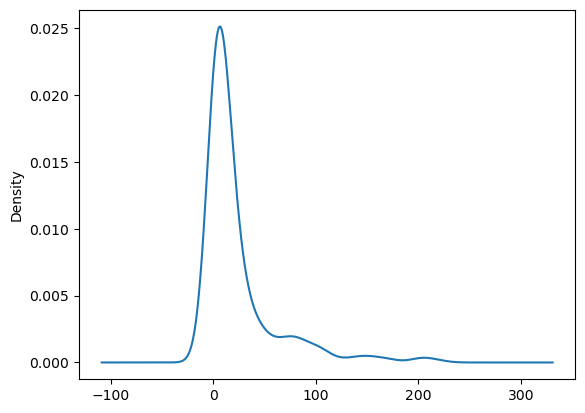

In [171]:
df["innings"].plot(kind = "kde")

In [172]:
#hightest==>highest